**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 3

# Important Libs

In [66]:
import pandas as pd

# Data Preparation

In [67]:
#Splitting Train and test set
train_x_e1 = pd.read_csv("training.csv")
train_x_e = pd.read_csv("training.csv").dropna(subset=["price"]).drop('price',axis=1)
train_y = train_x_e1[["price"]].dropna()
test_x1 = pd.read_csv("test.csv")
test_x = pd.read_csv("test.csv").dropna(subset=["price"]).drop('price',axis=1)
test_y = test_x1[["price"]].dropna()

In [69]:
train_y.head(2)

,price
0,15985.0
1,7349.0


In [70]:
a = train_x_e1[["price"]]
a.where(a > 39000).dropna()

,price
6,45400.0
132,41315.0


In [71]:
#Handling Missing values for train and test set
print(train_x_e.isnull().sum())
print(test_x.isnull().sum())

fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            8
carlength            4
carwidth             7
carheight            9
curbweight           6
enginetype           0
cylindernumber       0
enginesize          10
fuelsystem           0
boreratio           11
stroke               3
compressionratio    11
horsepower           5
peakrpm              9
citympg              4
highwaympg           7
dtype: int64
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           3
carlength           1
carwidth            1
carheight           2
curbweight          3
enginetype          0
cylindernumber      0
enginesize          1
fuelsystem          0
boreratio           0
stroke              1
compressionratio    1
horsepower          3
peakrpm             2
citympg             2
highwaympg         

In [72]:
#Converting our stored null vals of train set to a dictionary
null_vals = train_x_e.isnull().sum().to_dict()

In [73]:
#Train set
#Checking for values of keys whether they are > 0 so we can store the in nan_columns
nan_columns = []
for keys, values in null_vals.items():
    if values > 0:
        nan_columns.append(keys)
train_x_b = train_x_e.fillna(train_x_e.median())
print(nan_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [74]:
#Converting our stored null vals of test set to a dictionary
null_vals_test = test_x.isnull().sum().to_dict()

In [75]:
nan_columns = []
for keys, values in null_vals_test.items():
    if values > 0:
        nan_columns.append(keys)
test_x_b = test_x.fillna(test_x.median())
print(nan_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [76]:
d_types = train_x_b.dtypes.to_dict()
d_types

{'fueltype': dtype('O'),
 'aspiration': dtype('O'),
 'doornumber': dtype('O'),
 'carbody': dtype('O'),
 'drivewheel': dtype('O'),
 'enginelocation': dtype('O'),
 'wheelbase': dtype('float64'),
 'carlength': dtype('float64'),
 'carwidth': dtype('float64'),
 'carheight': dtype('float64'),
 'curbweight': dtype('float64'),
 'enginetype': dtype('O'),
 'cylindernumber': dtype('O'),
 'enginesize': dtype('float64'),
 'fuelsystem': dtype('O'),
 'boreratio': dtype('float64'),
 'stroke': dtype('float64'),
 'compressionratio': dtype('float64'),
 'horsepower': dtype('float64'),
 'peakrpm': dtype('float64'),
 'citympg': dtype('float64'),
 'highwaympg': dtype('float64')}

In [77]:
#Checking for values of keys whether they are object(string) so we can store them in categorical_columns
categorical_columns = []
for keys, values in d_types.items():
    if values == 'O':
        categorical_columns.append(keys)

In [78]:
categorical_columns

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [79]:
#pandas method get_dummies() for performing one-hot encoding
train_x_d = pd.get_dummies(train_x_b)
test_x_d = pd.get_dummies(test_x_b)

In [80]:
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,104.3,188.8,67.2,56.2,2403.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,0,0,1,0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
test_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,...,0,0,0,0,0,0,0,0,1,0
1,96.5,175.4,62.5,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
train_x_d.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi'],
      dtype='obj

In [83]:
#Using StandardScaler to transform columns to mean value 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x_d.values)
scaled_features = scaler.transform(train_x_d.values)
#converting back the data into a DF
train_x_e = pd.DataFrame(scaled_features, index=train_x_d.index, columns=train_x_d.columns)

In [84]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.040486,1.218356,0.697865,1.103479,-0.217359,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.729389,-0.266100,-1.003614,-0.089818,-0.968641,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,-0.080582,-0.080582,-0.114332,-0.248282,1.387274,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


In [85]:
#StandardScaling for test_set
scaled_features_test = scaler.transform(test_x_d.values)
scaled_features_test
test_x= pd.DataFrame(scaled_features_test, index=test_x_d.index, columns=test_x_d.columns)
test_x.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.311385,1.529613,2.799691,0.882498,0.874873,0.301750,-0.471250,0.473955,-0.384726,0.204338,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.368190,0.148909,-1.654180,0.175359,-0.278810,-0.352393,-0.628165,1.029791,-0.250249,-0.447582,...,-0.080582,-0.080582,-0.114332,4.027682,-0.720838,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


In [86]:
train_y.head(2)

,price
0,15985.0
1,7349.0


## KNN REGGRESSOR TO PREDICT CAR PRICES 

### a) Training Vs Validation Plot:

In [88]:
#Splitting data into 80% train and 20% validation
from sklearn.model_selection import train_test_split

train_split_x, val_split_x, train_split_y, val_split_y = train_test_split(train_x_e,train_y,test_size=0.20,random_state=0) 

In [90]:
train_split_x[:5]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
20,-2.156124,-2.309222,-0.953571,0.131163,-1.585128,-0.805261,-1.569654,0.134277,-0.088876,-1.208155,...,-0.080582,-0.080582,-0.114332,4.027682,-0.720838,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282
102,-0.223710,-0.146386,-0.152875,0.131163,-0.601921,-0.377552,-0.471250,0.473955,-0.250249,-0.474745,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
104,-0.223710,-0.146386,-0.152875,0.882498,-0.383870,-0.679464,-1.177367,0.473955,-0.250249,-0.936522,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,3.173551,-0.080582,-0.872562,-0.248282
23,1.690643,1.050756,1.298386,1.324459,1.465591,0.704299,1.529412,0.844512,2.977204,-0.203112,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,3.173551,-0.080582,-0.872562,-0.248282
54,-0.982228,-0.537452,-0.803440,0.175359,-1.115329,-0.830420,-0.902766,-0.298040,-0.250249,-0.936522,...,-0.080582,-0.080582,-0.114332,-0.248282,1.387274,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Appending the training and validation error for each value of k from 1 to 30.
knn_training_errors = []
knn_validation_error = []
for k in range(1,31):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(train_split_x, train_split_y)
    predicted = neigh.predict(val_split_x)
    mse_val = mean_squared_error(val_split_y, predicted)
    predict_train = neigh.predict(train_split_x)
    mse_train = mean_squared_error(train_split_y, predict_train)
    knn_validation_error.append(mse_val)
    knn_training_errors.append(mse_train)

Text(0, 0.5, 'Error')

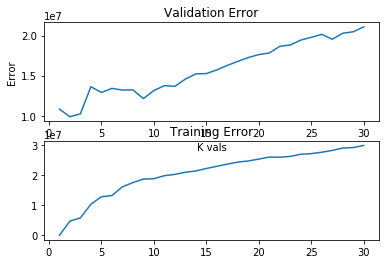

In [110]:
# training vs validation plot
import matplotlib
import matplotlib.pyplot as plt
plt.subplot(2,1,2)
plt.title("Training Error")
plt.plot(range(1,31), knn_training_errors)
plt.subplot(2, 1, 1)
plt.title("Validation Error")
plt.plot(range(1,31), knn_validation_error)
plt.xlabel("K vals")
plt.ylabel("Error")

### b) Test your model:

In [126]:
#Finding the best K by checking lowest value error using min,
#We index to check for location of this lowest value error, then considering that counting starts from 0 we have to append by +1
min_error = min(knn_validation_error)
index_of_bestk = knn_validation_error.index(a)
index_of_bestk = index_of_bestk+1
best_knn = KNeighborsRegressor(n_neighbors=index_of_bestk)
best_knn.fit(train_split_x, train_split_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [127]:
knn_preds = best_knn.predict(test_x)

In [128]:
knn_mse = mean_squared_error(test_y, knn_preds)
print(knn_mse)

16440950.8203125


## DECISION TREE REGRESSOR TO PREDICT CAR PRICES

### c) Grid Search to find best model:

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters = {'max_depth':[None,1,5,10], "min_samples_split":[0.01,0.05,0.1,0.3],"max_features":["auto","sqrt","log2"],
              "max_leaf_nodes":[10,50,100,250],"random_state": [0]}
regressor = DecisionTreeRegressor(random_state=0)
decision_tree_grid = GridSearchCV(regressor,parameters, cv= 5,scoring="neg_mean_squared_error")
decision_tree_grid.fit(train_split_x, train_split_y)

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 1, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 50, 100, 250],
                         'min

In [133]:
#Finding the best_parameter to use  for decision tree model
best_parameter = decision_tree_grid.best_params_
best_score = abs(decision_tree_grid.best_score_)

In [134]:
print(best_parameter)
print(best_score)

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_split': 0.1, 'random_state': 0}
9735744.803052153


### d) Test your model:

In [135]:
#Utilizing the best parameters
best_tree = DecisionTreeRegressor(**best_parameter)

In [138]:
best_tree.fit(train_split_x,train_split_y)
tree_preds = best_tree.predict(test_x)

In [140]:
tree_mse = mean_squared_error(test_y, tree_preds)
print(tree_mse)

13739352.776688596


## ENSEMBLE BAGGING REGRESSOR TO PREDICT CAR PRICES

### e) Grid Search to find best model:

In [144]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
param_grid = {"base_estimator":[linear_regression,knn,dt],"n_estimators":[25, 50, 100, 250],
              "bootstrap_features":[False,True],"random_state":[0]}
bag_regressor = BaggingRegressor()
bag_grid = GridSearchCV(bag_regressor,param_grid, cv= 5,scoring="neg_mean_squared_error")
bag_grid.fit(train_split_x,train_split_y)

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator': [LinearRegression(copy_X=True,
                                                             fit_inte...
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,
                                                           

In [147]:
best_param_bag_grid = bag_grid.best_params_
best_score_bag_grid = abs(bag_grid.best_score_)

In [148]:
print(best_param_bag_grid)
print(best_score_bag_grid)

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best'), 'bootstrap_features': False, 'n_estimators': 25, 'random_state': 0}
7161371.275606452


### f) Test your model:

In [149]:
best_bag = BaggingRegressor(**best_param_bag_grid) 

In [150]:
best_bag.fit(train_split_x, train_split_y)
bag_preds = best_bag.predict(test_x)

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [151]:
bag_mse = mean_squared_error(test_y, bag_preds) 
print(bag_mse)

8127908.44622


## RANDOM FOREST REGRESSOR TO PREDICT CAR PRICES

### g) Grid Search to find best model:

In [154]:
from sklearn.ensemble import RandomForestRegressor
parameters = {"n_estimators" :[25,50,100,250], "max_depth":[None,1,5,10],"random_state": [0]}
random_forest_regressor = RandomForestRegressor()
random_forest_grid = GridSearchCV(random_forest_regressor,parameters, cv= 5,scoring="neg_mean_squared_error")
random_forest_grid.fit(train_split_x,train_split_y)

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\almir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 1, 5, 10],


In [157]:
rf_best_parameters = random_forest_grid.best_params_
rf_best_score = abs(random_forest_grid.best_score_)

In [158]:
print(rf_best_parameters)
print(rf_best_score)

{'max_depth': 5, 'n_estimators': 25, 'random_state': 0}
6979447.220426163


### h) Test your model:

In [159]:
best_random_forest = RandomForestRegressor(**rf_best_parameters) 

In [160]:
best_random_forest.fit(train_split_x,train_split_y)
random_forest_preds = best_random_forest.predict(test_x)

C:\Users\almir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [161]:
random_forest_mse = mean_squared_error(test_y, random_forest_preds)
print(random_forest_mse)

7327095.23837682


### i) Feature Importances:

In [ ]:
top_3_rf_features = []
print(top_3_rf_features)